# Hyperparameter Tuning
- grid search
- randomized search
- successive halving


## Human Fall Detection


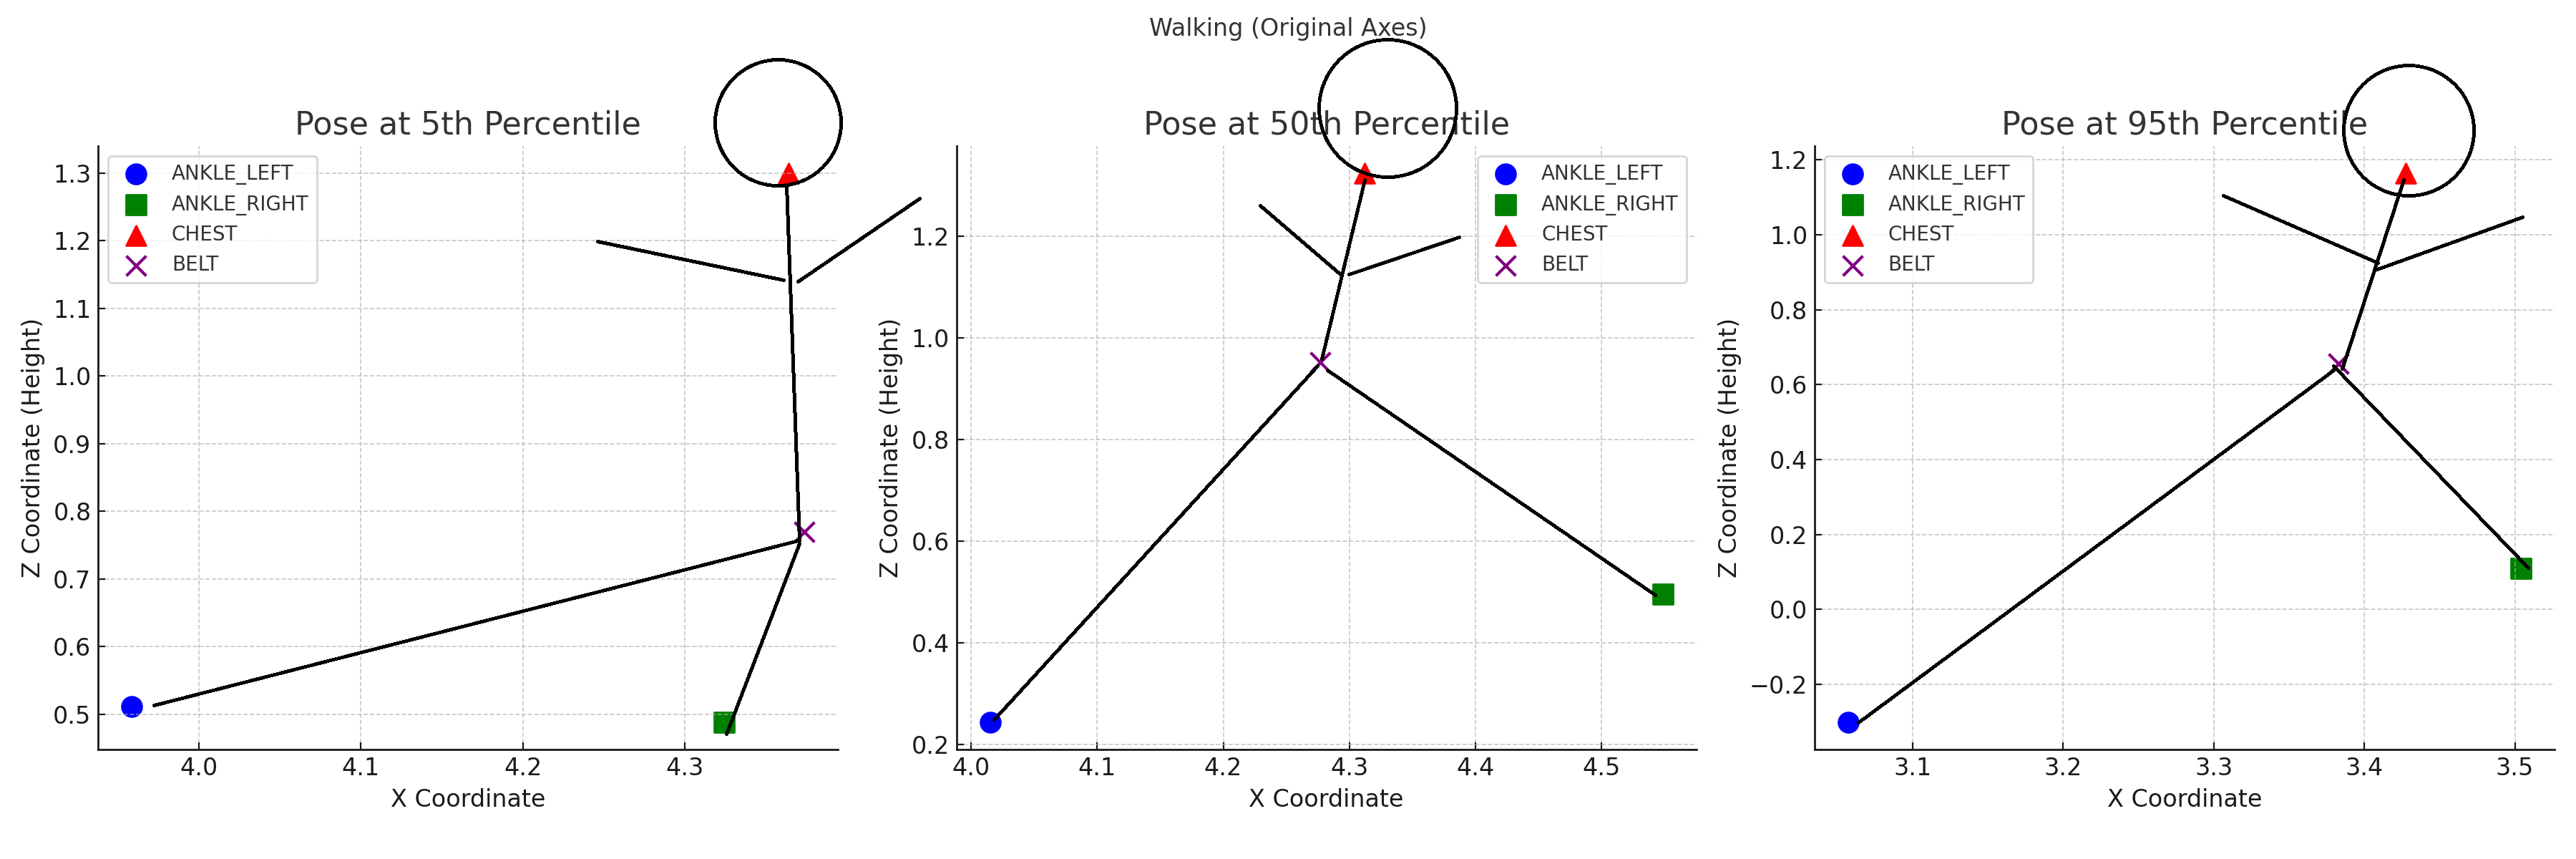

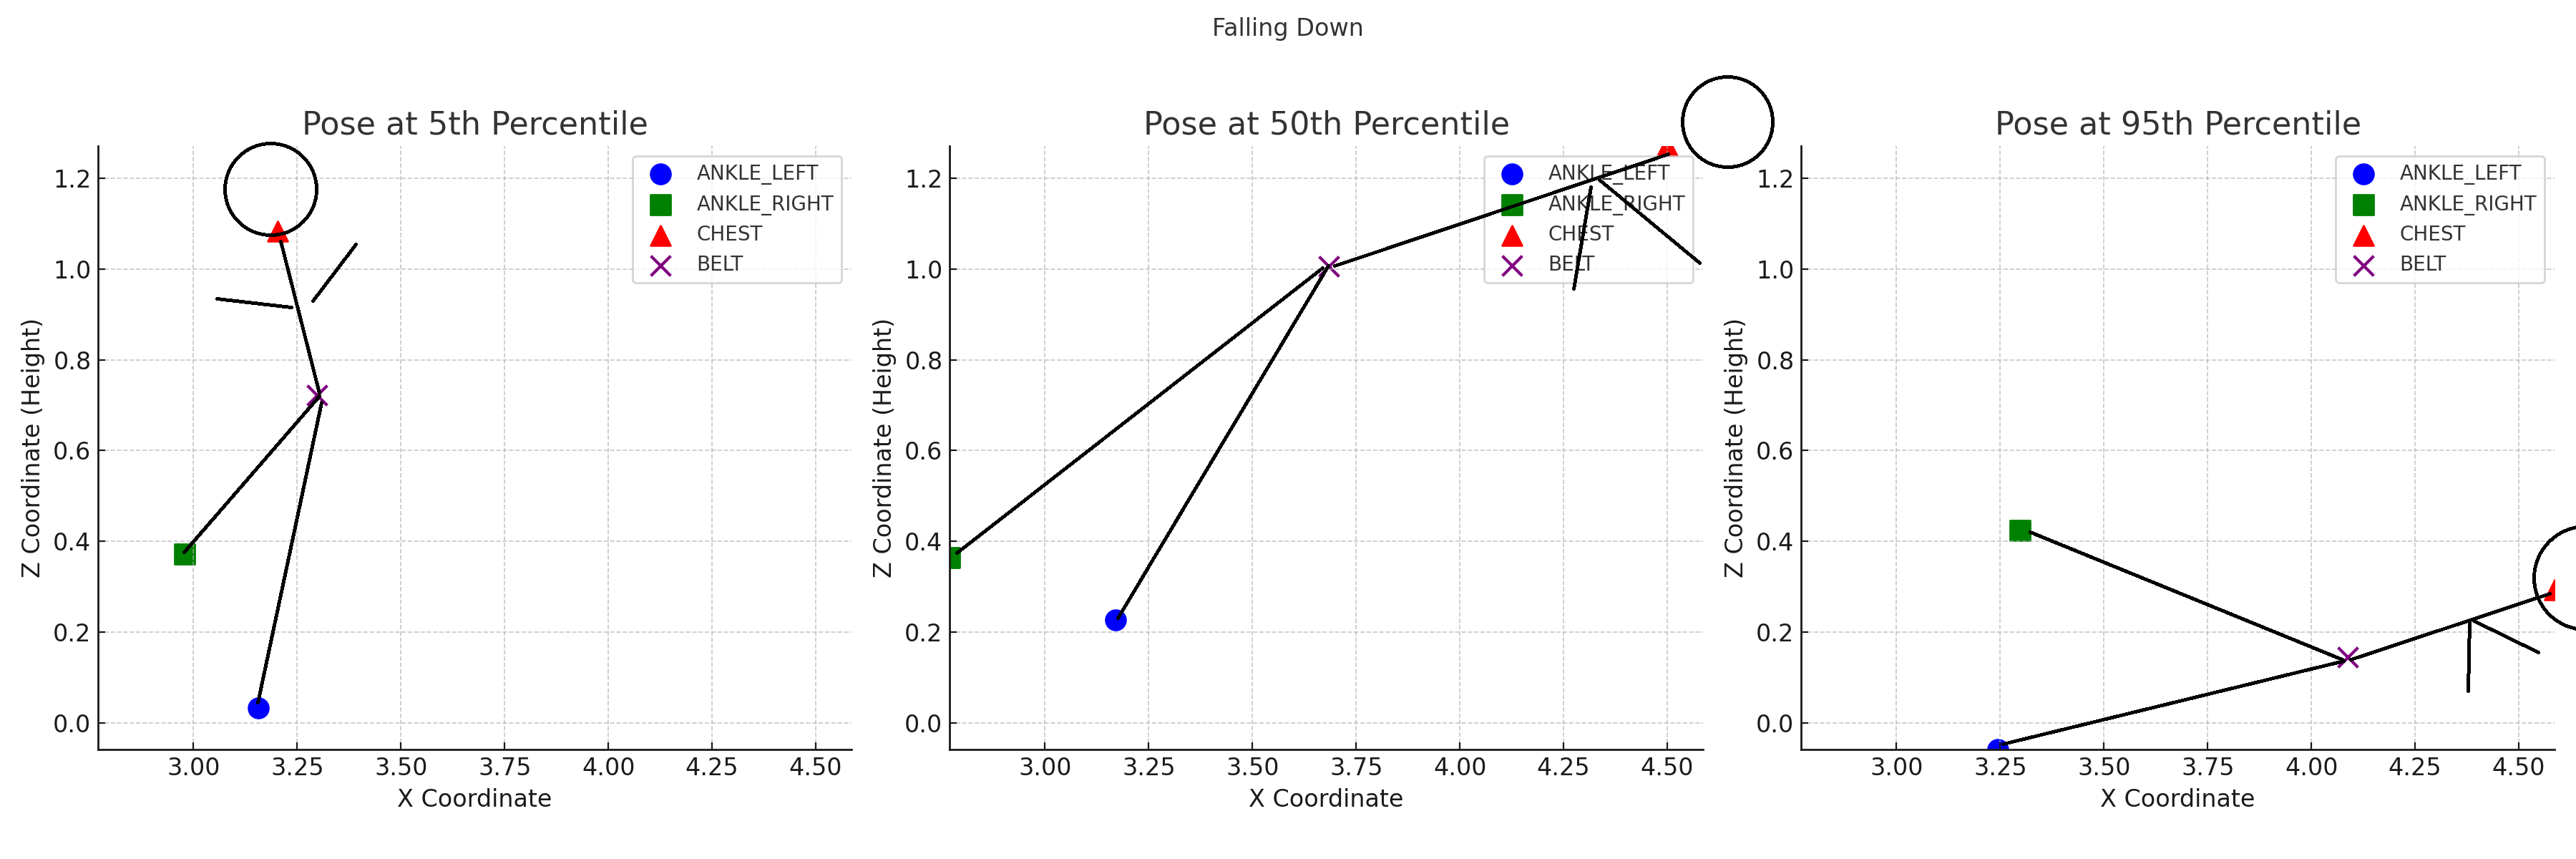

## Actions
- Walking, Sitting, Lying, getting up, sitting down, ..., Falling
- Set the Target to 1 if Falling, 0 otherwise

In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## Grid Search
- specifying hyperparameters
- specifying evaluation metrics
- below takes 115 seconds

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

# Load your data
# data = pd.read_csv('dmc10_important_features.csv')
data = pd.read_csv('resampled_data_allactions_train.csv')

# Assuming your data is already loaded and is named `data`
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Initialize SVM classifier
svm = SVC(random_state=42)

# Define the parameter grid for SVM
param_grid = {
    # 'C': [0.1, 0.5, 1, 5, 10, 100, 1000],  # Regularization parameter
    'C': 10**np.linspace(-4, 4, 100),  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly']  # Type of kernel
}

# Define custom scorer functions for each target class
f1_score_0 = make_scorer(f1_score, pos_label=0)
f1_score_1 = make_scorer(f1_score, pos_label=1)
test_accuracy = make_scorer(accuracy_score)

# Set up the scoring parameter as a dictionary with custom scorers
scoring = {'f1_score_0': f1_score_0, 'f1_score_1': f1_score_1, 'test_accuracy': test_accuracy}

# Setup GridSearchCV with the F1 score for class 0 as the scoring metric
grid_search = GridSearchCV(svm, param_grid=param_grid, scoring=scoring,
                           cv=3, n_jobs=-1, verbose=3, refit='f1_score_1')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X, y)

# After fitting, the best model can be accessed with grid_search.best_estimator_
best_model = grid_search.best_estimator_

# Get the best F1 score for class 1
best_f1_score_1 = grid_search.best_score_

# Print the results
print("Best model parameters: ", grid_search.best_params_)
print("Best F1 score for class 1: ", best_f1_score_1)


Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best model parameters:  {'C': 95.45484566618347, 'kernel': 'rbf'}
Best F1 score for class 1:  0.9902475778748868


In [21]:
# After fitting, you can get the results for all iterations
results = pd.DataFrame(grid_search.cv_results_)

# Extract the scores for each target class and test accuracy
results[['mean_test_f1_score_0', 'mean_test_f1_score_1', 'mean_test_test_accuracy']]


,mean_test_f1_score_0,mean_test_f1_score_1,mean_test_test_accuracy
0,0.743390,0.830497,0.795858
1,0.757116,0.836705,0.804734
2,0.836738,0.872717,0.857002
3,0.743390,0.830497,0.795858
4,0.757116,0.836705,0.804734
...,...,...,...
295,0.990026,0.990248,0.990138
296,0.968556,0.970244,0.969428
297,0.945549,0.947885,0.946746
298,0.990026,0.990248,0.990138


### Grid Search Results

In [22]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_f1_score_0,split1_test_f1_score_0,split2_test_f1_score_0,...,split2_test_f1_score_1,mean_test_f1_score_1,std_test_f1_score_1,rank_test_f1_score_1,split0_test_test_accuracy,split1_test_test_accuracy,split2_test_test_accuracy,mean_test_test_accuracy,std_test_test_accuracy,rank_test_test_accuracy
0,0.048465,0.016582,0.033773,0.014508,0.0001,linear,"{'C': 0.0001, 'kernel': 'linear'}",0.729323,0.743494,0.757353,...,0.836634,0.830497,0.004998,295,0.786982,0.795858,0.804734,0.795858,0.007247,295
1,0.073666,0.018791,0.061591,0.016342,0.0001,rbf,"{'C': 0.0001, 'kernel': 'rbf'}",0.734082,0.761905,0.775362,...,0.845000,0.836705,0.007722,267,0.789941,0.807692,0.816568,0.804734,0.011070,267
2,0.067641,0.016569,0.042413,0.006354,0.0001,poly,"{'C': 0.0001, 'kernel': 'poly'}",0.830450,0.848684,0.831081,...,0.868421,0.872717,0.003269,240,0.855030,0.863905,0.852071,0.857002,0.005029,240
3,0.038749,0.001660,0.022131,0.000685,0.00012,linear,"{'C': 0.00012045035402587823, 'kernel': 'linear'}",0.729323,0.743494,0.757353,...,0.836634,0.830497,0.004998,295,0.786982,0.795858,0.804734,0.795858,0.007247,295
4,0.069038,0.016289,0.061262,0.024037,0.00012,rbf,"{'C': 0.00012045035402587823, 'kernel': 'rbf'}",0.734082,0.761905,0.775362,...,0.845000,0.836705,0.007722,267,0.789941,0.807692,0.816568,0.804734,0.011070,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.012163,0.000132,0.009576,0.000141,8302.175681,rbf,"{'C': 8302.175681319752, 'kernel': 'rbf'}",0.994048,0.991045,0.984985,...,0.985423,0.990248,0.003613,1,0.994083,0.991124,0.985207,0.990138,0.003690,1
296,0.019573,0.001745,0.008523,0.000103,8302.175681,poly,"{'C': 8302.175681319752, 'kernel': 'poly'}",0.972973,0.975904,0.956790,...,0.960227,0.970244,0.007187,68,0.973373,0.976331,0.958580,0.969428,0.007765,62
297,5.365000,3.344490,0.008435,0.001503,10000.0,linear,"{'C': 10000.0, 'kernel': 'linear'}",0.958084,0.957831,0.920732,...,0.925287,0.947885,0.015979,185,0.958580,0.958580,0.923077,0.946746,0.016736,178
298,0.012443,0.000092,0.010163,0.000368,10000.0,rbf,"{'C': 10000.0, 'kernel': 'rbf'}",0.994048,0.991045,0.984985,...,0.985423,0.990248,0.003613,1,0.994083,0.991124,0.985207,0.990138,0.003690,1


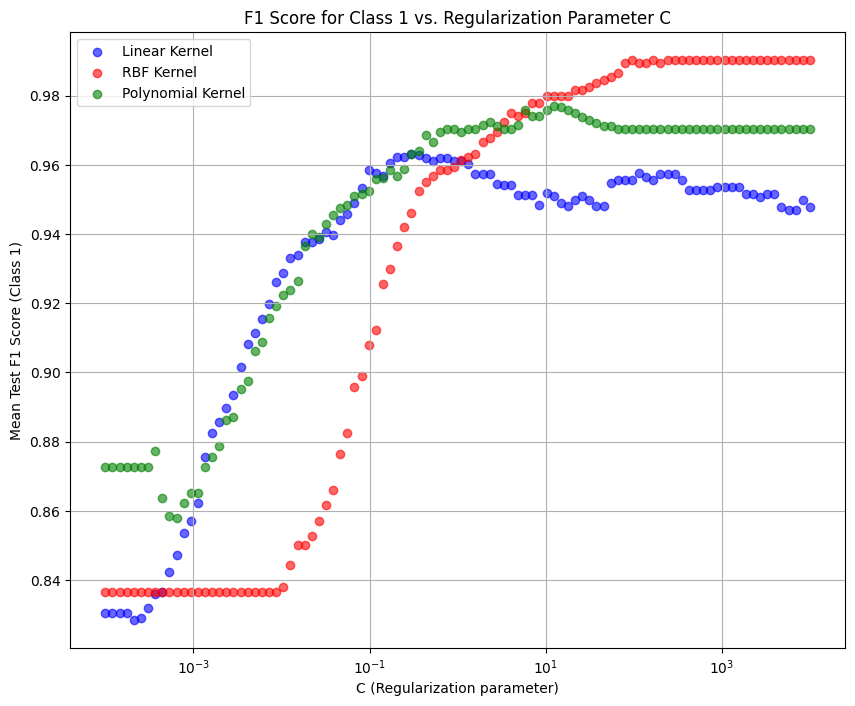

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the cv_results into a DataFrame for easier manipulation
results_df = pd.DataFrame(grid_search.cv_results_)

# Filter out the rows for each kernel type
linear_results = results_df[results_df['param_kernel'] == 'linear']
rbf_results = results_df[results_df['param_kernel'] == 'rbf']
poly_results = results_df[results_df['param_kernel'] == 'poly']

# Plot the scores for each kernel as a function of C
plt.figure(figsize=(10, 8))

plt.scatter(linear_results['param_C'].astype(np.float64), linear_results['mean_test_f1_score_1'],
            color='blue', label='Linear Kernel', alpha=0.6)
plt.scatter(rbf_results['param_C'].astype(np.float64), rbf_results['mean_test_f1_score_1'],
            color='red', label='RBF Kernel', alpha=0.6)
plt.scatter(poly_results['param_C'].astype(np.float64), poly_results['mean_test_f1_score_1'],
            color='green', label='Polynomial Kernel', alpha=0.6)

plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Mean Test F1 Score (Class 1)')
plt.title('F1 Score for Class 1 vs. Regularization Parameter C')
plt.legend()
plt.grid(True)
plt.show()


## Successive Halving
- Halving Grid Search
- test **300, 100, 34, 12 hyperparameters** each step
- test the hyperparameters with **20, 60, 180, 540 samples** each step
- below takes **26 seconds**

In [24]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Assuming your data is already loaded and is named `data`
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Initialize SVM classifier
svm = SVC(random_state=42)

# Define the parameter grid for SVM
param_grid = {
    # 'C': [0.1, 0.5, 1, 5, 10, 100, 1000],  # Regularization parameter
    'C': 10**np.linspace(-4, 4, 100),  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly']  # Type of kernel
}

# Define custom scorer function for F1 score class 1
f1_score_1 = make_scorer(f1_score, pos_label=1)

# Setup HalvingGridSearchCV with the F1 score for class 1 as the scoring metric
halving_grid_search = HalvingGridSearchCV(svm, param_grid=param_grid, scoring=f1_score_1,
                                          factor=3, min_resources='exhaust', aggressive_elimination=False,
                                          refit=True, random_state=42, verbose=2)

# Fit the HalvingGridSearchCV to find the best hyperparameters
halving_grid_search.fit(X, y)

# After fitting, the best model can be accessed with halving_grid_search.best_estimator_
best_model = halving_grid_search.best_estimator_

# Get the best F1 score for class 1
best_f1_score_1 = halving_grid_search.best_score_

# Print the results
print("Best model parameters: ", halving_grid_search.best_params_)
print("Best F1 score for class 1: ", best_f1_score_1)


n_iterations: 4
n_required_iterations: 6
n_possible_iterations: 4
min_resources_: 20
max_resources_: 1014
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 300
n_resources: 20
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END ............................C=0.0001, kernel=linear; total time=   0.0s
[CV] END ............................C=0.0001, kernel=linear; total time=   0.0s
[CV] END ............................C=0.0001, kernel=linear; total time=   0.0s
[CV] END ............................C=0.0001, kernel=linear; total time=   0.0s
[CV] END ............................C=0.0001, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...............................C=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...............................C=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...............................C=0.0001, kernel=rbf; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ............C=0.00012045035402587823, kernel=linear; total time=   0.0s
[CV] END ............C=0.00012045035402587823, kernel=linear; total time=   0.0s
[CV] END ...............C=0.00012045035402587823, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00012045035402587823, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00012045035402587823, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00012045035402587823, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00012045035402587823, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.00012045035402587823, kernel=poly; total time=   0.0s
[CV] END ..............C=0.00012045035402587823, kernel=poly; total time=   0.0s
[CV] END ..............C=0.00012045035402587823, kernel=poly; total time=   0.0s
[CV] END ..............C=0.00012045035402587823, kernel=poly; total time=   0.0s
[CV] END ..............C=0.00012045035402587823, kernel=poly; total time=   0.0s
[CV] END ..............C=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END .................C=0.000145082877849594, kernel=rbf; total time=   0.0s
[CV] END .................C=0.000145082877849594, kernel=rbf; total time=   0.0s
[CV] END ................C=0.000145082877849594, kernel=poly; total time=   0.0s
[CV] END ................C=0.000145082877849594, kernel=poly; total time=   0.0s
[CV] END ................C=0.000145082877849594, kernel=poly; total time=   0.0s
[CV] END ................C=0.000145082877849594, kernel=poly; total time=   0.0s
[CV] END ................C=0.000145082877849594, kernel=poly; total time=   0.0s
[CV] END .............C=0.0001747528400007683, kernel=linear; total time=   0.0s
[CV] END .............C=0.0001747528400007683, kernel=linear; total time=   0.0s
[CV] END .............C=0.0001747528400007683, kernel=linear; total time=   0.0s
[CV] END .............C=0.0001747528400007683, kernel=linear; total time=   0.0s
[CV] END .............C=0.0001747528400007683, kernel=linear; total time=   0.0s
[CV] END ................C=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ...............C=0.0001747528400007683, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0001747528400007683, kernel=poly; total time=   0.0s
[CV] END ............C=0.00021049041445120198, kernel=linear; total time=   0.0s
[CV] END ............C=0.00021049041445120198, kernel=linear; total time=   0.0s
[CV] END ............C=0.00021049041445120198, kernel=linear; total time=   0.0s
[CV] END ............C=0.00021049041445120198, kernel=linear; total time=   0.0s
[CV] END ............C=0.00021049041445120198, kernel=linear; total time=   0.0s
[CV] END ...............C=0.00021049041445120198, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00021049041445120198, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00021049041445120198, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00021049041445120198, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00021049041445120198, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ............C=0.00025353644939701115, kernel=linear; total time=   0.0s
[CV] END ............C=0.00025353644939701115, kernel=linear; total time=   0.0s
[CV] END ...............C=0.00025353644939701115, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00025353644939701115, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00025353644939701115, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00025353644939701115, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.00025353644939701115, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.00025353644939701115, kernel=poly; total time=   0.0s
[CV] END ..............C=0.00025353644939701115, kernel=poly; total time=   0.0s
[CV] END ..............C=0.00025353644939701115, kernel=poly; total time=   0.0s
[CV] END ..............C=0.00025353644939701115, kernel=poly; total time=   0.0s
[CV] END ..............C=0.00025353644939701115, kernel=poly; total time=   0.0s
[CV] END .............C=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ................C=0.0003053855508833416, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0003053855508833416, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0003053855508833416, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0003053855508833416, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.0003053855508833416, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0003053855508833416, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0003053855508833416, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0003053855508833416, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0003053855508833416, kernel=poly; total time=   0.0s
[CV] END .............C=0.0003678379771828634, kernel=linear; total time=   0.0s
[CV] END .............C=0.0003678379771828634, kernel=linear; total time=   0.0s
[CV] END .............C=0.0003678379771828634, kernel=linear; total time=   0.0s
[CV] END .............C=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ...............C=0.0003678379771828634, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0003678379771828634, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0003678379771828634, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0003678379771828634, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0003678379771828634, kernel=poly; total time=   0.0s
[CV] END .............C=0.0004430621457583882, kernel=linear; total time=   0.0s
[CV] END .............C=0.0004430621457583882, kernel=linear; total time=   0.0s
[CV] END .............C=0.0004430621457583882, kernel=linear; total time=   0.0s
[CV] END .............C=0.0004430621457583882, kernel=linear; total time=   0.0s
[CV] END .............C=0.0004430621457583882, kernel=linear; total time=   0.0s
[CV] END ................C=0.0004430621457583882, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0004430621457583882, kernel=rbf; total time=   0.0s
[CV] END ................C=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ...............C=0.0004430621457583882, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0004430621457583882, kernel=poly; total time=   0.0s
[CV] END .............C=0.0005336699231206312, kernel=linear; total time=   0.0s
[CV] END .............C=0.0005336699231206312, kernel=linear; total time=   0.0s
[CV] END .............C=0.0005336699231206312, kernel=linear; total time=   0.0s
[CV] END .............C=0.0005336699231206312, kernel=linear; total time=   0.0s
[CV] END .............C=0.0005336699231206312, kernel=linear; total time=   0.0s
[CV] END ................C=0.0005336699231206312, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0005336699231206312, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0005336699231206312, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0005336699231206312, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0005336699231206312, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END .............C=0.0006428073117284319, kernel=linear; total time=   0.0s
[CV] END .............C=0.0006428073117284319, kernel=linear; total time=   0.0s
[CV] END .............C=0.0006428073117284319, kernel=linear; total time=   0.0s
[CV] END ................C=0.0006428073117284319, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0006428073117284319, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0006428073117284319, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0006428073117284319, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0006428073117284319, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.0006428073117284319, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0006428073117284319, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0006428073117284319, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0006428073117284319, kernel=poly; total time=   0.0s
[CV] END ...............C=0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END .................C=0.000774263682681127, kernel=rbf; total time=   0.0s
[CV] END .................C=0.000774263682681127, kernel=rbf; total time=   0.0s
[CV] END .................C=0.000774263682681127, kernel=rbf; total time=   0.0s
[CV] END ................C=0.000774263682681127, kernel=poly; total time=   0.0s
[CV] END ................C=0.000774263682681127, kernel=poly; total time=   0.0s
[CV] END ................C=0.000774263682681127, kernel=poly; total time=   0.0s
[CV] END ................C=0.000774263682681127, kernel=poly; total time=   0.0s
[CV] END ................C=0.000774263682681127, kernel=poly; total time=   0.0s
[CV] END .............C=0.0009326033468832199, kernel=linear; total time=   0.0s
[CV] END .............C=0.0009326033468832199, kernel=linear; total time=   0.0s
[CV] END .............C=0.0009326033468832199, kernel=linear; total time=   0.0s
[CV] END .............C=0.0009326033468832199, kernel=linear; total time=   0.0s
[CV] END .............C=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ................C=0.0009326033468832199, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.0009326033468832199, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0009326033468832199, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0009326033468832199, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0009326033468832199, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0009326033468832199, kernel=poly; total time=   0.0s
[CV] END .............C=0.0011233240329780276, kernel=linear; total time=   0.0s
[CV] END .............C=0.0011233240329780276, kernel=linear; total time=   0.0s
[CV] END .............C=0.0011233240329780276, kernel=linear; total time=   0.0s
[CV] END .............C=0.0011233240329780276, kernel=linear; total time=   0.0s
[CV] END .............C=0.0011233240329780276, kernel=linear; total time=   0.0s
[CV] END ................C=0.0011233240329780276, kernel=rbf; total time=   0.0s
[CV] END ................C=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ...............C=0.0011233240329780276, kernel=poly; total time=   0.0s
[CV] END .............C=0.0013530477745798076, kernel=linear; total time=   0.0s
[CV] END .............C=0.0013530477745798076, kernel=linear; total time=   0.0s
[CV] END .............C=0.0013530477745798076, kernel=linear; total time=   0.0s
[CV] END .............C=0.0013530477745798076, kernel=linear; total time=   0.0s
[CV] END .............C=0.0013530477745798076, kernel=linear; total time=   0.0s
[CV] END ................C=0.0013530477745798076, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0013530477745798076, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0013530477745798076, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0013530477745798076, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0013530477745798076, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.0013530477745798076, kernel=poly; total time=   0.0s
[CV] END ...............C=0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END .............C=0.0016297508346206436, kernel=linear; total time=   0.0s
[CV] END .............C=0.0016297508346206436, kernel=linear; total time=   0.0s
[CV] END ................C=0.0016297508346206436, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0016297508346206436, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0016297508346206436, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0016297508346206436, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0016297508346206436, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.0016297508346206436, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0016297508346206436, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0016297508346206436, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0016297508346206436, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0016297508346206436, kernel=poly; total time=   0.0s
[CV] END .............C=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ................C=0.0019630406500402726, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0019630406500402726, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0019630406500402726, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.0019630406500402726, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0019630406500402726, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0019630406500402726, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0019630406500402726, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0019630406500402726, kernel=poly; total time=   0.0s
[CV] END ..............C=0.002364489412645407, kernel=linear; total time=   0.0s
[CV] END ..............C=0.002364489412645407, kernel=linear; total time=   0.0s
[CV] END ..............C=0.002364489412645407, kernel=linear; total time=   0.0s
[CV] END ..............C=0.002364489412645407, kernel=linear; total time=   0.0s
[CV] END ..............C=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ................C=0.002364489412645407, kernel=poly; total time=   0.0s
[CV] END ................C=0.002364489412645407, kernel=poly; total time=   0.0s
[CV] END ................C=0.002364489412645407, kernel=poly; total time=   0.0s
[CV] END ................C=0.002364489412645407, kernel=poly; total time=   0.0s
[CV] END ................C=0.002364489412645407, kernel=poly; total time=   0.0s
[CV] END ..............C=0.002848035868435802, kernel=linear; total time=   0.0s
[CV] END ..............C=0.002848035868435802, kernel=linear; total time=   0.0s
[CV] END ..............C=0.002848035868435802, kernel=linear; total time=   0.0s
[CV] END ..............C=0.002848035868435802, kernel=linear; total time=   0.0s
[CV] END ..............C=0.002848035868435802, kernel=linear; total time=   0.0s
[CV] END .................C=0.002848035868435802, kernel=rbf; total time=   0.0s
[CV] END .................C=0.002848035868435802, kernel=rbf; total time=   0.0s
[CV] END .................C=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END .............C=0.0041320124001153384, kernel=linear; total time=   0.0s
[CV] END .............C=0.0041320124001153384, kernel=linear; total time=   0.0s
[CV] END .............C=0.0041320124001153384, kernel=linear; total time=   0.0s
[CV] END .............C=0.0041320124001153384, kernel=linear; total time=   0.0s
[CV] END ................C=0.0041320124001153384, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0041320124001153384, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0041320124001153384, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0041320124001153384, kernel=rbf; total time=   0.0s
[CV] END ................C=0.0041320124001153384, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.0041320124001153384, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0041320124001153384, kernel=poly; total time=   0.0s
[CV] END ...............C=0.0041320124001153384, kernel=poly; total time=   0.0s
[CV] END ...............C=0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ..............C=0.004977023564332114, kernel=linear; total time=   0.0s
[CV] END .................C=0.004977023564332114, kernel=rbf; total time=   0.0s
[CV] END .................C=0.004977023564332114, kernel=rbf; total time=   0.0s
[CV] END .................C=0.004977023564332114, kernel=rbf; total time=   0.0s
[CV] END .................C=0.004977023564332114, kernel=rbf; total time=   0.0s
[CV] END .................C=0.004977023564332114, kernel=rbf; total time=   0.0s
[CV] END ................C=0.004977023564332114, kernel=poly; total time=   0.0s
[CV] END ................C=0.004977023564332114, kernel=poly; total time=   0.0s
[CV] END ................C=0.004977023564332114, kernel=poly; total time=   0.0s
[CV] END ................C=0.004977023564332114, kernel=poly; total time=   0.0s
[CV] END ................C=0.004977023564332114, kernel=poly; total time=   0.0s
[CV] END ..............C=0.005994842503189409, kernel=linear; total time=   0.0s
[CV] END ..............C=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END .................C=0.005994842503189409, kernel=rbf; total time=   0.0s
[CV] END .................C=0.005994842503189409, kernel=rbf; total time=   0.0s
[CV] END ................C=0.005994842503189409, kernel=poly; total time=   0.0s
[CV] END ................C=0.005994842503189409, kernel=poly; total time=   0.0s
[CV] END ................C=0.005994842503189409, kernel=poly; total time=   0.0s
[CV] END ................C=0.005994842503189409, kernel=poly; total time=   0.0s
[CV] END ................C=0.005994842503189409, kernel=poly; total time=   0.0s
[CV] END ..............C=0.007220809018385471, kernel=linear; total time=   0.0s
[CV] END ..............C=0.007220809018385471, kernel=linear; total time=   0.0s
[CV] END ..............C=0.007220809018385471, kernel=linear; total time=   0.0s
[CV] END ..............C=0.007220809018385471, kernel=linear; total time=   0.0s
[CV] END ..............C=0.007220809018385471, kernel=linear; total time=   0.0s
[CV] END .................C=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ................C=0.007220809018385471, kernel=poly; total time=   0.0s
[CV] END ................C=0.007220809018385471, kernel=poly; total time=   0.0s
[CV] END ..............C=0.008697490026177835, kernel=linear; total time=   0.0s
[CV] END ..............C=0.008697490026177835, kernel=linear; total time=   0.0s
[CV] END ..............C=0.008697490026177835, kernel=linear; total time=   0.0s
[CV] END ..............C=0.008697490026177835, kernel=linear; total time=   0.0s
[CV] END ..............C=0.008697490026177835, kernel=linear; total time=   0.0s
[CV] END .................C=0.008697490026177835, kernel=rbf; total time=   0.0s
[CV] END .................C=0.008697490026177835, kernel=rbf; total time=   0.0s
[CV] END .................C=0.008697490026177835, kernel=rbf; total time=   0.0s
[CV] END .................C=0.008697490026177835, kernel=rbf; total time=   0.0s
[CV] END .................C=0.008697490026177835, kernel=rbf; total time=   0.0s
[CV] END ................C=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ..............C=0.010476157527896652, kernel=linear; total time=   0.0s
[CV] END ..............C=0.010476157527896652, kernel=linear; total time=   0.0s
[CV] END ..............C=0.010476157527896652, kernel=linear; total time=   0.0s
[CV] END ..............C=0.010476157527896652, kernel=linear; total time=   0.0s
[CV] END .................C=0.010476157527896652, kernel=rbf; total time=   0.0s
[CV] END .................C=0.010476157527896652, kernel=rbf; total time=   0.0s
[CV] END .................C=0.010476157527896652, kernel=rbf; total time=   0.0s
[CV] END .................C=0.010476157527896652, kernel=rbf; total time=   0.0s
[CV] END .................C=0.010476157527896652, kernel=rbf; total time=   0.0s
[CV] END ................C=0.010476157527896652, kernel=poly; total time=   0.0s
[CV] END ................C=0.010476157527896652, kernel=poly; total time=   0.0s
[CV] END ................C=0.010476157527896652, kernel=poly; total time=   0.0s
[CV] END ................C=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ..............C=0.012618568830660211, kernel=linear; total time=   0.0s
[CV] END .................C=0.012618568830660211, kernel=rbf; total time=   0.0s
[CV] END .................C=0.012618568830660211, kernel=rbf; total time=   0.0s
[CV] END .................C=0.012618568830660211, kernel=rbf; total time=   0.0s
[CV] END .................C=0.012618568830660211, kernel=rbf; total time=   0.0s
[CV] END .................C=0.012618568830660211, kernel=rbf; total time=   0.0s
[CV] END ................C=0.012618568830660211, kernel=poly; total time=   0.0s
[CV] END ................C=0.012618568830660211, kernel=poly; total time=   0.0s
[CV] END ................C=0.012618568830660211, kernel=poly; total time=   0.0s
[CV] END ................C=0.012618568830660211, kernel=poly; total time=   0.0s
[CV] END ................C=0.012618568830660211, kernel=poly; total time=   0.0s
[CV] END ..............C=0.015199110829529346, kernel=linear; total time=   0.0s
[CV] END ..............C=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END .................C=0.015199110829529346, kernel=rbf; total time=   0.0s
[CV] END ................C=0.015199110829529346, kernel=poly; total time=   0.0s
[CV] END ................C=0.015199110829529346, kernel=poly; total time=   0.0s
[CV] END ................C=0.015199110829529346, kernel=poly; total time=   0.0s
[CV] END ................C=0.015199110829529346, kernel=poly; total time=   0.0s
[CV] END ................C=0.015199110829529346, kernel=poly; total time=   0.0s
[CV] END ..............C=0.018307382802953697, kernel=linear; total time=   0.0s
[CV] END ..............C=0.018307382802953697, kernel=linear; total time=   0.0s
[CV] END ..............C=0.018307382802953697, kernel=linear; total time=   0.0s
[CV] END ..............C=0.018307382802953697, kernel=linear; total time=   0.0s
[CV] END ..............C=0.018307382802953697, kernel=linear; total time=   0.0s
[CV] END .................C=0.018307382802953697, kernel=rbf; total time=   0.0s
[CV] END .................C=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ................C=0.018307382802953697, kernel=poly; total time=   0.0s
[CV] END ..............C=0.022051307399030457, kernel=linear; total time=   0.0s
[CV] END ..............C=0.022051307399030457, kernel=linear; total time=   0.0s
[CV] END ..............C=0.022051307399030457, kernel=linear; total time=   0.0s
[CV] END ..............C=0.022051307399030457, kernel=linear; total time=   0.0s
[CV] END ..............C=0.022051307399030457, kernel=linear; total time=   0.0s
[CV] END .................C=0.022051307399030457, kernel=rbf; total time=   0.0s
[CV] END .................C=0.022051307399030457, kernel=rbf; total time=   0.0s
[CV] END .................C=0.022051307399030457, kernel=rbf; total time=   0.0s
[CV] END .................C=0.022051307399030457, kernel=rbf; total time=   0.0s
[CV] END .................C=0.022051307399030457, kernel=rbf; total time=   0.0s
[CV] END ................C=0.022051307399030457, kernel=poly; total time=   0.0s
[CV] END ................C=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ..............C=0.026560877829466867, kernel=linear; total time=   0.0s
[CV] END ..............C=0.026560877829466867, kernel=linear; total time=   0.0s
[CV] END ..............C=0.026560877829466867, kernel=linear; total time=   0.0s
[CV] END .................C=0.026560877829466867, kernel=rbf; total time=   0.0s
[CV] END .................C=0.026560877829466867, kernel=rbf; total time=   0.0s
[CV] END .................C=0.026560877829466867, kernel=rbf; total time=   0.0s
[CV] END .................C=0.026560877829466867, kernel=rbf; total time=   0.0s
[CV] END .................C=0.026560877829466867, kernel=rbf; total time=   0.0s
[CV] END ................C=0.026560877829466867, kernel=poly; total time=   0.0s
[CV] END ................C=0.026560877829466867, kernel=poly; total time=   0.0s
[CV] END ................C=0.026560877829466867, kernel=poly; total time=   0.0s
[CV] END ................C=0.026560877829466867, kernel=poly; total time=   0.0s
[CV] END ................C=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END ..................C=0.03199267137797385, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.03199267137797385, kernel=rbf; total time=   0.0s
[CV] END .................C=0.03199267137797385, kernel=poly; total time=   0.0s
[CV] END .................C=0.03199267137797385, kernel=poly; total time=   0.0s
[CV] END .................C=0.03199267137797385, kernel=poly; total time=   0.0s
[CV] END .................C=0.03199267137797385, kernel=poly; total time=   0.0s
[CV] END .................C=0.03199267137797385, kernel=poly; total time=   0.0s
[CV] END ...............C=0.03853528593710531, kernel=linear; total time=   0.0s
[CV] END ...............C=0.03853528593710531, kernel=linear; total time=   0.0s
[CV] END ...............C=0.03853528593710531, kernel=linear; total time=   0.0s
[CV] END ...............C=0.03853528593710531, kernel=linear; total time=   0.0s
[CV] END ...............C=0.03853528593710531, kernel=linear; total time=   0.0s
[CV] END ..................C

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END .................C=0.03853528593710531, kernel=poly; total time=   0.0s
[CV] END ...............C=0.04641588833612782, kernel=linear; total time=   0.0s
[CV] END ...............C=0.04641588833612782, kernel=linear; total time=   0.0s
[CV] END ...............C=0.04641588833612782, kernel=linear; total time=   0.0s
[CV] END ...............C=0.04641588833612782, kernel=linear; total time=   0.0s
[CV] END ...............C=0.04641588833612782, kernel=linear; total time=   0.0s
[CV] END ..................C=0.04641588833612782, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.04641588833612782, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.04641588833612782, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.04641588833612782, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.04641588833612782, kernel=rbf; total time=   0.0s
[CV] END .................C=0.04641588833612782, kernel=poly; total time=   0.0s
[CV] END .................C=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END .................C=0.055908101825122285, kernel=rbf; total time=   0.0s
[CV] END .................C=0.055908101825122285, kernel=rbf; total time=   0.0s
[CV] END .................C=0.055908101825122285, kernel=rbf; total time=   0.0s
[CV] END .................C=0.055908101825122285, kernel=rbf; total time=   0.0s
[CV] END .................C=0.055908101825122285, kernel=rbf; total time=   0.0s
[CV] END ................C=0.055908101825122285, kernel=poly; total time=   0.0s
[CV] END ................C=0.055908101825122285, kernel=poly; total time=   0.0s
[CV] END ................C=0.055908101825122285, kernel=poly; total time=   0.0s
[CV] END ................C=0.055908101825122285, kernel=poly; total time=   0.0s
[CV] END ................C=0.055908101825122285, kernel=poly; total time=   0.0s
[CV] END ...............C=0.06734150657750829, kernel=linear; total time=   0.0s
[CV] END ...............C=0.06734150657750829, kernel=linear; total time=   0.0s
[CV] END ...............C=0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

[CV] END .................C=0.06734150657750829, kernel=poly; total time=   0.0s
[CV] END .................C=0.06734150657750829, kernel=poly; total time=   0.0s
[CV] END .................C=0.06734150657750829, kernel=poly; total time=   0.0s
[CV] END .................C=0.06734150657750829, kernel=poly; total time=   0.0s
[CV] END .................C=0.06734150657750829, kernel=poly; total time=   0.0s
[CV] END ...............C=0.08111308307896872, kernel=linear; total time=   0.0s
[CV] END ...............C=0.08111308307896872, kernel=linear; total time=   0.0s
[CV] END ...............C=0.08111308307896872, kernel=linear; total time=   0.0s
[CV] END ...............C=0.08111308307896872, kernel=linear; total time=   0.0s
[CV] END ...............C=0.08111308307896872, kernel=linear; total time=   0.0s
[CV] END ..................C=0.08111308307896872, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.08111308307896872, kernel=rbf; total time=   0.0s
[CV] END ..................C

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END .................C=0.08111308307896872, kernel=poly; total time=   0.0s
[CV] END ...............C=0.09770099572992257, kernel=linear; total time=   0.0s
[CV] END ...............C=0.09770099572992257, kernel=linear; total time=   0.0s
[CV] END ...............C=0.09770099572992257, kernel=linear; total time=   0.0s
[CV] END ...............C=0.09770099572992257, kernel=linear; total time=   0.0s
[CV] END ...............C=0.09770099572992257, kernel=linear; total time=   0.0s
[CV] END ..................C=0.09770099572992257, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.09770099572992257, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.09770099572992257, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.09770099572992257, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.09770099572992257, kernel=rbf; total time=   0.0s
[CV] END .................C=0.09770099572992257, kernel=poly; total time=   0.0s
[CV] END .................C=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END .................C=0.14174741629268062, kernel=poly; total time=   0.0s
[CV] END .................C=0.14174741629268062, kernel=poly; total time=   0.0s
[CV] END .................C=0.14174741629268062, kernel=poly; total time=   0.0s
[CV] END .................C=0.14174741629268062, kernel=poly; total time=   0.0s
[CV] END .................C=0.14174741629268062, kernel=poly; total time=   0.0s
[CV] END ................C=0.1707352647470692, kernel=linear; total time=   0.0s
[CV] END ................C=0.1707352647470692, kernel=linear; total time=   0.0s
[CV] END ................C=0.1707352647470692, kernel=linear; total time=   0.0s
[CV] END ................C=0.1707352647470692, kernel=linear; total time=   0.0s
[CV] END ................C=0.1707352647470692, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1707352647470692, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1707352647470692, kernel=rbf; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ...................C=0.1707352647470692, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1707352647470692, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1707352647470692, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1707352647470692, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1707352647470692, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1707352647470692, kernel=poly; total time=   0.0s
[CV] END ...............C=0.20565123083486536, kernel=linear; total time=   0.0s
[CV] END ...............C=0.20565123083486536, kernel=linear; total time=   0.0s
[CV] END ...............C=0.20565123083486536, kernel=linear; total time=   0.0s
[CV] END ...............C=0.20565123083486536, kernel=linear; total time=   0.0s
[CV] END ...............C=0.20565123083486536, kernel=linear; total time=   0.0s
[CV] END ..................C=0.20565123083486536, kernel=rbf; total time=   0.0s
[CV] END ..................C

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ...............C=0.24770763559917114, kernel=linear; total time=   0.0s
[CV] END ..................C=0.24770763559917114, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.24770763559917114, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.24770763559917114, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.24770763559917114, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.24770763559917114, kernel=rbf; total time=   0.0s
[CV] END .................C=0.24770763559917114, kernel=poly; total time=   0.0s
[CV] END .................C=0.24770763559917114, kernel=poly; total time=   0.0s
[CV] END .................C=0.24770763559917114, kernel=poly; total time=   0.0s
[CV] END .................C=0.24770763559917114, kernel=poly; total time=   0.0s
[CV] END .................C=0.24770763559917114, kernel=poly; total time=   0.0s
[CV] END .................C=0.298364724028334, kernel=linear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END .................C=0.298364724028334, kernel=linear; total time=   0.0s
[CV] END .................C=0.298364724028334, kernel=linear; total time=   0.0s
[CV] END .................C=0.298364724028334, kernel=linear; total time=   0.0s
[CV] END .................C=0.298364724028334, kernel=linear; total time=   0.0s
[CV] END ....................C=0.298364724028334, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.298364724028334, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.298364724028334, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.298364724028334, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.298364724028334, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.298364724028334, kernel=poly; total time=   0.0s
[CV] END ...................C=0.298364724028334, kernel=poly; total time=   0.0s
[CV] END ...................C=0.298364724028334, kernel=poly; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ...................C=0.298364724028334, kernel=poly; total time=   0.0s
[CV] END ...................C=0.298364724028334, kernel=poly; total time=   0.0s
[CV] END ................C=0.3593813663804629, kernel=linear; total time=   0.0s
[CV] END ................C=0.3593813663804629, kernel=linear; total time=   0.0s
[CV] END ................C=0.3593813663804629, kernel=linear; total time=   0.0s
[CV] END ................C=0.3593813663804629, kernel=linear; total time=   0.0s
[CV] END ................C=0.3593813663804629, kernel=linear; total time=   0.0s
[CV] END ...................C=0.3593813663804629, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.3593813663804629, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.3593813663804629, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.3593813663804629, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.3593813663804629, kernel=rbf; total time=   0.0s
[CV] END ..................C

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ..................C=0.3593813663804629, kernel=poly; total time=   0.0s
[CV] END ..................C=0.3593813663804629, kernel=poly; total time=   0.0s
[CV] END ..................C=0.3593813663804629, kernel=poly; total time=   0.0s
[CV] END ..................C=0.3593813663804629, kernel=poly; total time=   0.0s
[CV] END ...............C=0.43287612810830617, kernel=linear; total time=   0.0s
[CV] END ...............C=0.43287612810830617, kernel=linear; total time=   0.0s
[CV] END ...............C=0.43287612810830617, kernel=linear; total time=   0.0s
[CV] END ...............C=0.43287612810830617, kernel=linear; total time=   0.0s
[CV] END ...............C=0.43287612810830617, kernel=linear; total time=   0.0s
[CV] END ..................C=0.43287612810830617, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.43287612810830617, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.43287612810830617, kernel=rbf; total time=   0.0s
[CV] END ..................C

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ..................C=0.43287612810830617, kernel=rbf; total time=   0.0s
[CV] END .................C=0.43287612810830617, kernel=poly; total time=   0.0s
[CV] END .................C=0.43287612810830617, kernel=poly; total time=   0.0s
[CV] END .................C=0.43287612810830617, kernel=poly; total time=   0.0s
[CV] END .................C=0.43287612810830617, kernel=poly; total time=   0.0s
[CV] END .................C=0.43287612810830617, kernel=poly; total time=   0.0s
[CV] END .................C=0.521400828799969, kernel=linear; total time=   0.0s
[CV] END .................C=0.521400828799969, kernel=linear; total time=   0.0s
[CV] END .................C=0.521400828799969, kernel=linear; total time=   0.0s
[CV] END .................C=0.521400828799969, kernel=linear; total time=   0.0s
[CV] END .................C=0.521400828799969, kernel=linear; total time=   0.0s
[CV] END ....................C=0.521400828799969, kernel=rbf; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ................C=0.6280291441834259, kernel=linear; total time=   0.0s
[CV] END ...................C=0.6280291441834259, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.6280291441834259, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.6280291441834259, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.6280291441834259, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.6280291441834259, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.6280291441834259, kernel=poly; total time=   0.0s
[CV] END ..................C=0.6280291441834259, kernel=poly; total time=   0.0s
[CV] END ..................C=0.6280291441834259, kernel=poly; total time=   0.0s
[CV] END ..................C=0.6280291441834259, kernel=poly; total time=   0.0s
[CV] END ..................C=0.6280291441834259, kernel=poly; total time=   0.0s
[CV] END ................C=0.7564633275546291, kernel=linear; total time=   0.0s
[CV] END ................C=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ................C=0.7564633275546291, kernel=linear; total time=   0.0s
[CV] END ................C=0.7564633275546291, kernel=linear; total time=   0.0s
[CV] END ...................C=0.7564633275546291, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.7564633275546291, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.7564633275546291, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.7564633275546291, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.7564633275546291, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.7564633275546291, kernel=poly; total time=   0.0s
[CV] END ..................C=0.7564633275546291, kernel=poly; total time=   0.0s
[CV] END ..................C=0.7564633275546291, kernel=poly; total time=   0.0s
[CV] END ..................C=0.7564633275546291, kernel=poly; total time=   0.0s
[CV] END ..................C=0.7564633275546291, kernel=poly; total time=   0.0s
[CV] END ................C=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ................C=0.9111627561154896, kernel=linear; total time=   0.0s
[CV] END ................C=0.9111627561154896, kernel=linear; total time=   0.0s
[CV] END ................C=0.9111627561154896, kernel=linear; total time=   0.0s
[CV] END ...................C=0.9111627561154896, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.9111627561154896, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.9111627561154896, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.9111627561154896, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.9111627561154896, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.9111627561154896, kernel=poly; total time=   0.0s
[CV] END ..................C=0.9111627561154896, kernel=poly; total time=   0.0s
[CV] END ..................C=0.9111627561154896, kernel=poly; total time=   0.0s
[CV] END ..................C=0.9111627561154896, kernel=poly; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ..................C=0.9111627561154896, kernel=poly; total time=   0.0s
[CV] END ................C=1.0974987654930568, kernel=linear; total time=   0.0s
[CV] END ................C=1.0974987654930568, kernel=linear; total time=   0.0s
[CV] END ................C=1.0974987654930568, kernel=linear; total time=   0.0s
[CV] END ................C=1.0974987654930568, kernel=linear; total time=   0.0s
[CV] END ................C=1.0974987654930568, kernel=linear; total time=   0.0s
[CV] END ...................C=1.0974987654930568, kernel=rbf; total time=   0.0s
[CV] END ...................C=1.0974987654930568, kernel=rbf; total time=   0.0s
[CV] END ...................C=1.0974987654930568, kernel=rbf; total time=   0.0s
[CV] END ...................C=1.0974987654930568, kernel=rbf; total time=   0.0s
[CV] END ...................C=1.0974987654930568, kernel=rbf; total time=   0.0s
[CV] END ..................C=1.0974987654930568, kernel=poly; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ..................C=1.0974987654930568, kernel=poly; total time=   0.0s
[CV] END ..................C=1.0974987654930568, kernel=poly; total time=   0.0s
[CV] END ..................C=1.0974987654930568, kernel=poly; total time=   0.0s
[CV] END ..................C=1.0974987654930568, kernel=poly; total time=   0.0s
[CV] END ................C=1.3219411484660315, kernel=linear; total time=   0.0s
[CV] END ................C=1.3219411484660315, kernel=linear; total time=   0.0s
[CV] END ................C=1.3219411484660315, kernel=linear; total time=   0.0s
[CV] END ................C=1.3219411484660315, kernel=linear; total time=   0.0s
[CV] END ................C=1.3219411484660315, kernel=linear; total time=   0.0s
[CV] END ...................C=1.3219411484660315, kernel=rbf; total time=   0.0s
[CV] END ...................C=1.3219411484660315, kernel=rbf; total time=   0.0s
[CV] END ...................C=1.3219411484660315, kernel=rbf; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ...................C=1.592282793341094, kernel=poly; total time=   0.0s
[CV] END ...................C=1.592282793341094, kernel=poly; total time=   0.0s
[CV] END ...................C=1.592282793341094, kernel=poly; total time=   0.0s
[CV] END ................C=1.9179102616724888, kernel=linear; total time=   0.0s
[CV] END ................C=1.9179102616724888, kernel=linear; total time=   0.0s
[CV] END ................C=1.9179102616724888, kernel=linear; total time=   0.0s
[CV] END ................C=1.9179102616724888, kernel=linear; total time=   0.0s
[CV] END ................C=1.9179102616724888, kernel=linear; total time=   0.0s
[CV] END ...................C=1.9179102616724888, kernel=rbf; total time=   0.0s
[CV] END ...................C=1.9179102616724888, kernel=rbf; total time=   0.0s
[CV] END ...................C=1.9179102616724888, kernel=rbf; total time=   0.0s
[CV] END ...................C=1.9179102616724888, kernel=rbf; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END .................C=2.310129700083163, kernel=linear; total time=   0.0s
[CV] END .................C=2.310129700083163, kernel=linear; total time=   0.0s
[CV] END .................C=2.310129700083163, kernel=linear; total time=   0.0s
[CV] END .................C=2.310129700083163, kernel=linear; total time=   0.0s
[CV] END ....................C=2.310129700083163, kernel=rbf; total time=   0.0s
[CV] END ....................C=2.310129700083163, kernel=rbf; total time=   0.0s
[CV] END ....................C=2.310129700083163, kernel=rbf; total time=   0.0s
[CV] END ....................C=2.310129700083163, kernel=rbf; total time=   0.0s
[CV] END ....................C=2.310129700083163, kernel=rbf; total time=   0.0s
[CV] END ...................C=2.310129700083163, kernel=poly; total time=   0.0s
[CV] END ...................C=2.310129700083163, kernel=poly; total time=   0.0s
[CV] END ...................C=2.310129700083163, kernel=poly; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ....................C=3.351602650938848, kernel=rbf; total time=   0.0s
[CV] END ....................C=3.351602650938848, kernel=rbf; total time=   0.0s
[CV] END ...................C=3.351602650938848, kernel=poly; total time=   0.0s
[CV] END ...................C=3.351602650938848, kernel=poly; total time=   0.0s
[CV] END ...................C=3.351602650938848, kernel=poly; total time=   0.0s
[CV] END ...................C=3.351602650938848, kernel=poly; total time=   0.0s
[CV] END ...................C=3.351602650938848, kernel=poly; total time=   0.0s
[CV] END .................C=4.037017258596558, kernel=linear; total time=   0.0s
[CV] END .................C=4.037017258596558, kernel=linear; total time=   0.0s
[CV] END .................C=4.037017258596558, kernel=linear; total time=   0.0s
[CV] END .................C=4.037017258596558, kernel=linear; total time=   0.0s
[CV] END .................C=4.037017258596558, kernel=linear; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ...................C=8.497534359086455, kernel=poly; total time=   0.0s
[CV] END ...................C=8.497534359086455, kernel=poly; total time=   0.0s
[CV] END ...................C=8.497534359086455, kernel=poly; total time=   0.0s
[CV] END ...................C=8.497534359086455, kernel=poly; total time=   0.0s
[CV] END ...................C=8.497534359086455, kernel=poly; total time=   0.0s
[CV] END ................C=10.235310218990268, kernel=linear; total time=   0.0s
[CV] END ................C=10.235310218990268, kernel=linear; total time=   0.0s
[CV] END ................C=10.235310218990268, kernel=linear; total time=   0.0s
[CV] END ................C=10.235310218990268, kernel=linear; total time=   0.0s
[CV] END ................C=10.235310218990268, kernel=linear; total time=   0.0s
[CV] END ...................C=10.235310218990268, kernel=rbf; total time=   0.0s
[CV] END ...................C=10.235310218990268, kernel=rbf; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV] END ................C=14.849682622544666, kernel=linear; total time=   0.0s
[CV] END ...................C=14.849682622544666, kernel=rbf; total time=   0.0s
[CV] END ...................C=14.849682622544666, kernel=rbf; total time=   0.0s
[CV] END ...................C=14.849682622544666, kernel=rbf; total time=   0.0s
[CV] END ...................C=14.849682622544666, kernel=rbf; total time=   0.0s
[CV] END ...................C=14.849682622544666, kernel=rbf; total time=   0.0s
[CV] END ..................C=14.849682622544666, kernel=poly; total time=   0.0s
[CV] END ..................C=14.849682622544666, kernel=poly; total time=   0.0s
[CV] END ..................C=14.849682622544666, kernel=poly; total time=   0.0s
[CV] END ..................C=14.849682622544666, kernel=poly; total time=   0.0s
[CV] END ..................C=14.849682622544666, kernel=poly; total time=   0.0s
[CV] END ................C=17.886495290574352, kernel=linear; total time=   0.0s
[CV] END ................C=1

### Halving Search Results

In [27]:
pd.DataFrame(halving_grid_search.cv_results_)

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,20,0.003465,0.000443,0.002998,0.000172,0.0001,linear,"{'C': 0.0001, 'kernel': 'linear'}",0.000000,...,0.160000,0.195959,352,0.000000,0.695652,0.695652,0.000000,0.000000,0.278261,0.340799
1,0,20,0.003987,0.000474,0.002766,0.000138,0.0001,rbf,"{'C': 0.0001, 'kernel': 'rbf'}",0.000000,...,0.160000,0.195959,352,0.000000,0.695652,0.695652,0.000000,0.000000,0.278261,0.340799
2,0,20,0.003800,0.000385,0.003763,0.001058,0.0001,poly,"{'C': 0.0001, 'kernel': 'poly'}",0.000000,...,0.160000,0.195959,352,0.000000,0.695652,0.695652,0.000000,0.000000,0.278261,0.340799
3,0,20,0.003929,0.000432,0.003276,0.001047,0.00012,linear,"{'C': 0.00012045035402587823, 'kernel': 'linear'}",0.000000,...,0.160000,0.195959,352,0.000000,0.695652,0.695652,0.000000,0.000000,0.278261,0.340799
4,0,20,0.003737,0.000273,0.003252,0.001071,0.00012,rbf,"{'C': 0.00012045035402587823, 'kernel': 'rbf'}",0.000000,...,0.160000,0.195959,352,0.000000,0.695652,0.695652,0.000000,0.000000,0.278261,0.340799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,3,540,0.006314,0.001359,0.004409,0.002440,10.23531,rbf,"{'C': 10.235310218990268, 'kernel': 'rbf'}",0.972973,...,0.976076,0.013821,7,0.988290,0.988010,0.980861,0.983373,0.985915,0.985290,0.002831
442,3,540,0.005597,0.000308,0.003187,0.000137,21.544347,rbf,"{'C': 21.544346900318867, 'kernel': 'rbf'}",0.981818,...,0.979645,0.012327,5,0.992941,0.988010,0.990338,0.990431,0.988235,0.989991,0.001790
443,3,540,0.005800,0.000240,0.003200,0.000067,14.849683,rbf,"{'C': 14.849682622544666, 'kernel': 'rbf'}",0.972973,...,0.976076,0.013821,7,0.988290,0.988010,0.980861,0.983373,0.985915,0.985290,0.002831
444,3,540,0.006862,0.001572,0.003294,0.000131,12.328467,rbf,"{'C': 12.328467394420684, 'kernel': 'rbf'}",0.972973,...,0.976076,0.013821,7,0.988290,0.988010,0.980861,0.983373,0.985915,0.985290,0.002831


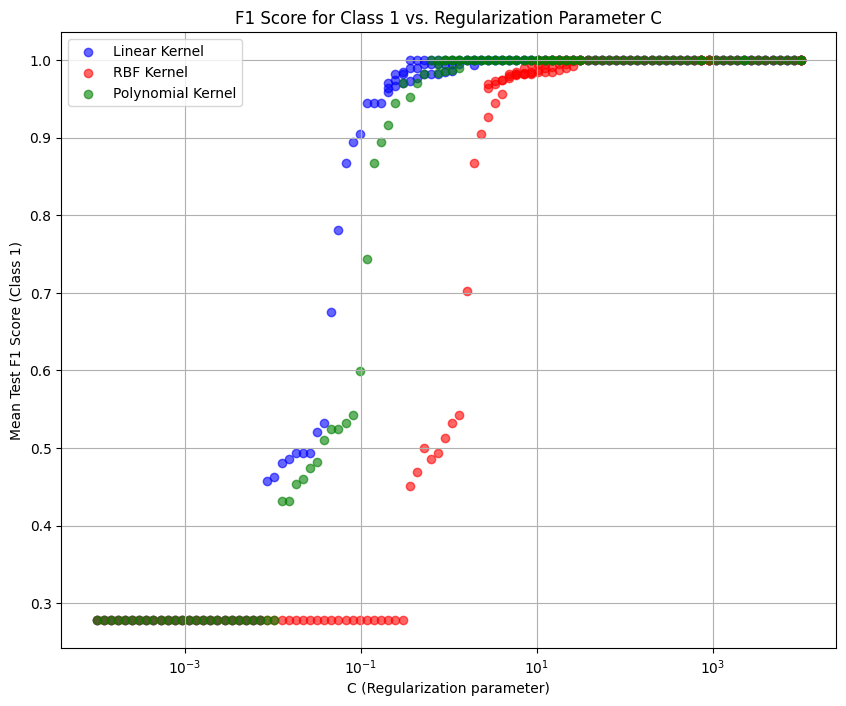

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the cv_results into a DataFrame for easier manipulation
results_df = pd.DataFrame(halving_grid_search.cv_results_)

# Filter out the rows for each kernel type
linear_results = results_df[results_df['param_kernel'] == 'linear']
rbf_results = results_df[results_df['param_kernel'] == 'rbf']
poly_results = results_df[results_df['param_kernel'] == 'poly']

# Plot the scores for each kernel as a function of C
plt.figure(figsize=(10, 8))

plt.scatter(linear_results['param_C'].astype(np.float64), linear_results['mean_train_score'],
            color='blue', label='Linear Kernel', alpha=0.6)
plt.scatter(rbf_results['param_C'].astype(np.float64), rbf_results['mean_train_score'],
            color='red', label='RBF Kernel', alpha=0.6)
plt.scatter(poly_results['param_C'].astype(np.float64), poly_results['mean_train_score'],
            color='green', label='Polynomial Kernel', alpha=0.6)

plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Mean Test F1 Score (Class 1)')
plt.title('F1 Score for Class 1 vs. Regularization Parameter C')
plt.legend()
plt.grid(True)
plt.show()


### Halving Search Process

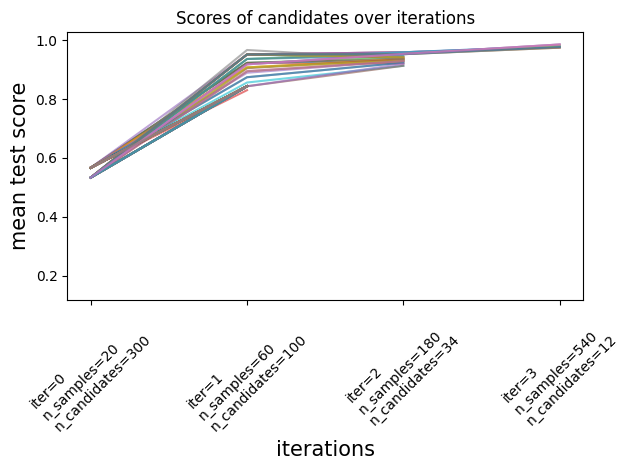

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'halving_grid_search' is your fitted HalvingGridSearchCV object
results = pd.DataFrame(halving_grid_search.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)

ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={halving_grid_search.n_resources_[i]}\nn_candidates={halving_grid_search.n_candidates_[i]}"
    for i in range(halving_grid_search.n_iterations_)
]

ax.set_xticks(range(halving_grid_search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()


- https://scikit-learn.org/stable/auto_examples/model_selection/plot_successive_halving_iterations.html#sphx-glr-auto-examples-model-selection-plot-successive-halving-iterations-py

### How Halving approximates full grid search

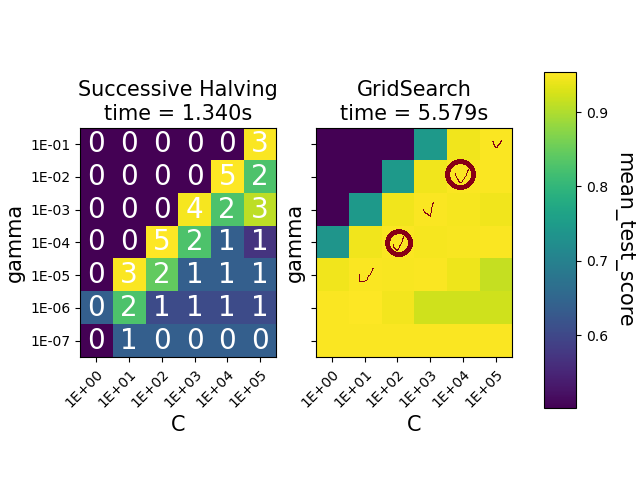
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_successive_halving_heatmap.html#sphx-glr-auto-examples-model-selection-plot-successive-halving-heatmap-py

## Randomized Search
- Define the distributions from which the hyperparameters are randomly drawn for using distributions in scipy.stats
- Define how many times to repeat the draw (n_iter)

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from scipy.stats import loguniform  # For generating numbers in a log-uniform distribution

# Load your data
data = pd.read_csv('resampled_data_allactions_train.csv')

# Assuming your data is already loaded and is named `data`
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Initialize SVM classifier
svm = SVC(random_state=42)

# Define the parameter distribution for SVM
param_distribution = {
    'C': loguniform(1e-4, 1e4),  # Log-uniform distribution over C
    'kernel': ['linear', 'rbf', 'poly']  # Type of kernel
}

# Define custom scorer function for F1 score class 1
f1_score_1 = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV with the F1 score for class 1 as the scoring metric
random_search = RandomizedSearchCV(svm, param_distributions=param_distribution, n_iter=50,
                                   scoring=f1_score_1, cv=3, n_jobs=-1, verbose=3, random_state=42)

# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(X, y)

# After fitting, the best model can be accessed with random_search.best_estimator_
best_model = random_search.best_estimator_

# Get the best F1 score for class 1
best_f1_score_1 = random_search.best_score_

# Print the results
print("Best model parameters: ", random_search.best_params_)
print("Best F1 score for class 1: ", best_f1_score_1)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best model parameters:  {'C': 5309.5322690092235, 'kernel': 'rbf'}
Best F1 score for class 1:  0.9902475778748868


### Randomized Search Results

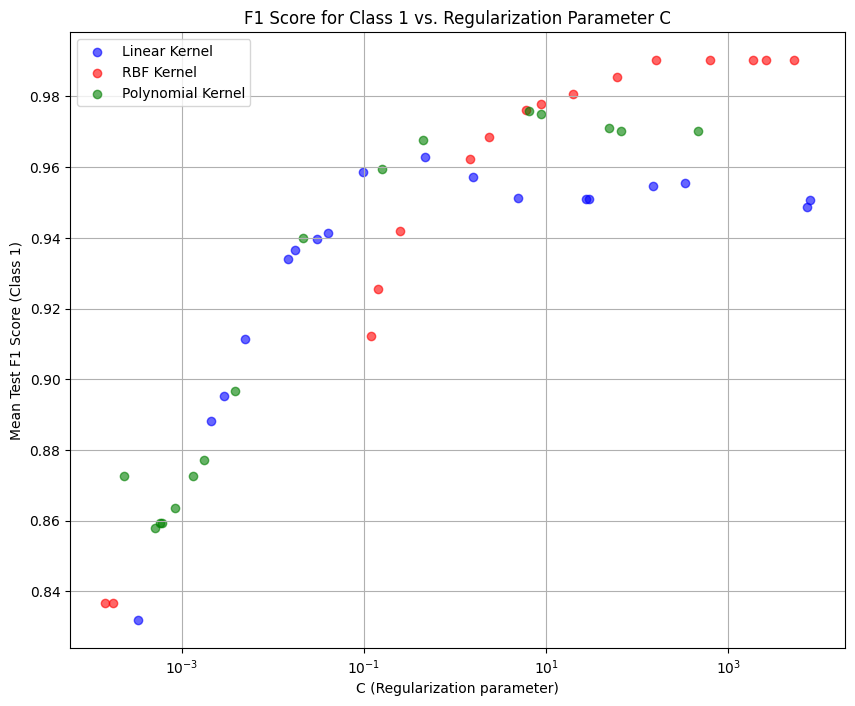

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the cv_results into a DataFrame for easier manipulation
results_df = pd.DataFrame(random_search.cv_results_)

# Filter out the rows for each kernel type
linear_results = results_df[results_df['param_kernel'] == 'linear']
rbf_results = results_df[results_df['param_kernel'] == 'rbf']
poly_results = results_df[results_df['param_kernel'] == 'poly']

# Plot the scores for each kernel as a function of C
plt.figure(figsize=(10, 8))

plt.scatter(linear_results['param_C'].astype(np.float64), linear_results['mean_test_score'],
            color='blue', label='Linear Kernel', alpha=0.6)
plt.scatter(rbf_results['param_C'].astype(np.float64), rbf_results['mean_test_score'],
            color='red', label='RBF Kernel', alpha=0.6)
plt.scatter(poly_results['param_C'].astype(np.float64), poly_results['mean_test_score'],
            color='green', label='Polynomial Kernel', alpha=0.6)

plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Mean Test F1 Score (Class 1)')
plt.title('F1 Score for Class 1 vs. Regularization Parameter C')
plt.legend()
plt.grid(True)
plt.show()


## Another Randomized Search use case with Neural Networks
- for (1 to 5 layers), random draw for each layer how many neurons
- random draw 20 different times, while keeping other hyperparameters (activation function, lr schedule) as exhaustive grid search

In [47]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint

# Assuming your data is already loaded and is named `data`
X = data.drop('target', axis=1)  # or use your processed feature set
y = data['target']

# Initialize a simple neural network model
mlp = MLPClassifier(max_iter=1000)

# Define the parameter space for the RandomizedSearchCV
param_distributions = {
    'hidden_layer_sizes': [(randint.rvs(5, 10),),
                           (randint.rvs(5, 10), randint.rvs(5, 10)),
                           (randint.rvs(5, 10), randint.rvs(5, 10), randint.rvs(5, 10)),
                           (randint.rvs(5, 10), randint.rvs(5, 10), randint.rvs(5, 10), randint.rvs(5, 10)),
                           (randint.rvs(5, 10), randint.rvs(5, 10), randint.rvs(5, 10), randint.rvs(5, 10), randint.rvs(5, 10))],
    'activation': ['logistic', 'relu'],
    'learning_rate': ['invscaling', 'adaptive'],
}

# Define custom scorer functions for each target class
f1_score_0 = make_scorer(f1_score, pos_label=0)
f1_score_1 = make_scorer(f1_score, pos_label=1)
test_accuracy = make_scorer(accuracy_score)

# Set up the scoring parameter as a dictionary with custom scorers
scoring = {'f1_score_0': f1_score_0, 'f1_score_1': f1_score_1, 'test_accuracy': test_accuracy}

# Define the RandomizedSearchCV with the custom scoring
random_search = RandomizedSearchCV(mlp, param_distributions=param_distributions,
                                   n_iter=20, n_jobs=-1, cv=3, random_state=42,
                                   scoring=scoring, refit='f1_score_1')  # refit using test_accuracy

# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(X, y)


# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_params)
print("Best score found: ", best_score)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found:  {'learning_rate': 'invscaling', 'hidden_layer_sizes': (5, 6), 'activation': 'relu'}
Best score found:  0.9883260781547453


In [53]:

# After fitting, you can get the results for all iterations
results = pd.DataFrame(random_search.cv_results_)

# Extract the scores for each target class and test accuracy
results[['param_learning_rate','param_hidden_layer_sizes','param_activation','mean_test_f1_score_0', 'mean_test_f1_score_1', 'mean_test_test_accuracy']].sort_values('mean_test_f1_score_1')


,param_learning_rate,param_hidden_layer_sizes,param_activation,mean_test_f1_score_0,mean_test_f1_score_1,mean_test_test_accuracy
8,invscaling,"(8, 5, 6, 6, 7)",logistic,0.444444,0.222222,0.500000
9,adaptive,"(8, 5, 6, 6, 7)",logistic,0.222222,0.444444,0.500000
7,adaptive,"(6, 6, 8, 7)",logistic,0.330348,0.774845,0.663708
6,invscaling,"(6, 6, 8, 7)",logistic,0.648649,0.871396,0.815582
10,invscaling,"(8,)",relu,0.964554,0.966359,0.965483
1,adaptive,"(8,)",logistic,0.964440,0.966456,0.965483
0,invscaling,"(8,)",logistic,0.967668,0.969175,0.968442
14,invscaling,"(9, 6, 6)",relu,0.973182,0.973550,0.973373
5,adaptive,"(9, 6, 6)",logistic,0.974068,0.974640,0.974359
16,invscaling,"(6, 6, 8, 7)",relu,0.973966,0.974737,0.974359


In [54]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_hidden_layer_sizes,param_activation,params,split0_test_f1_score_0,split1_test_f1_score_0,...,split2_test_f1_score_1,mean_test_f1_score_1,std_test_f1_score_1,rank_test_f1_score_1,split0_test_test_accuracy,split1_test_test_accuracy,split2_test_test_accuracy,mean_test_test_accuracy,std_test_test_accuracy,rank_test_test_accuracy
0,4.893229,0.898929,0.016170,0.004981,invscaling,"(8,)",logistic,"{'learning_rate': 'invscaling', 'hidden_layer_...",0.972973,0.975904,...,0.957020,0.969175,0.008681,14,0.973373,0.976331,0.955621,0.968442,0.009146,14
1,5.115817,0.636223,0.015338,0.004280,adaptive,"(8,)",logistic,"{'learning_rate': 'adaptive', 'hidden_layer_si...",0.972973,0.975904,...,0.948864,0.966456,0.012499,15,0.973373,0.976331,0.946746,0.965483,0.013304,15
2,4.812860,0.386469,0.014481,0.002888,invscaling,"(5, 6)",logistic,"{'learning_rate': 'invscaling', 'hidden_layer_...",0.982143,0.975758,...,0.968300,0.975844,0.005784,10,0.982249,0.976331,0.967456,0.975345,0.006079,10
3,3.585762,0.482495,0.011108,0.001310,adaptive,"(5, 6)",logistic,"{'learning_rate': 'adaptive', 'hidden_layer_si...",0.985163,0.984985,...,0.976744,0.982473,0.004051,4,0.985207,0.985207,0.976331,0.982249,0.004184,3
4,4.474078,0.741355,0.011013,0.000523,invscaling,"(9, 6, 6)",logistic,"{'learning_rate': 'invscaling', 'hidden_layer_...",0.967359,0.988024,...,0.976744,0.977533,0.008491,9,0.967456,0.988166,0.976331,0.977318,0.008484,8
5,4.479493,0.711017,0.010506,0.000246,adaptive,"(9, 6, 6)",logistic,"{'learning_rate': 'adaptive', 'hidden_layer_si...",0.961424,0.981928,...,0.979710,0.974640,0.009257,12,0.961538,0.982249,0.979290,0.974359,0.009146,11
6,2.674641,1.886577,0.010247,0.000194,invscaling,"(6, 6, 8, 7)",logistic,"{'learning_rate': 'invscaling', 'hidden_layer_...",0.960961,0.984985,...,0.666667,0.871396,0.145078,17,0.961538,0.985207,0.500000,0.815582,0.223359,17
7,1.777667,2.387462,0.009840,0.000234,adaptive,"(6, 6, 8, 7)",logistic,"{'learning_rate': 'adaptive', 'hidden_layer_si...",0.000000,0.991045,...,0.666667,0.774845,0.152988,18,0.500000,0.991124,0.500000,0.663708,0.231518,18
8,0.228856,0.040924,0.020511,0.004310,invscaling,"(8, 5, 6, 6, 7)",logistic,"{'learning_rate': 'invscaling', 'hidden_layer_...",0.666667,0.000000,...,0.000000,0.222222,0.314270,20,0.500000,0.500000,0.500000,0.500000,0.000000,19
9,0.273958,0.040019,0.021616,0.001377,adaptive,"(8, 5, 6, 6, 7)",logistic,"{'learning_rate': 'adaptive', 'hidden_layer_si...",0.666667,0.000000,...,0.666667,0.444444,0.314270,19,0.500000,0.500000,0.500000,0.500000,0.000000,19


### Side note on LR Schedule
1. **`invscaling`**:
   - As the number of iterations (`t`) increases, the learning rate decreases
   - `effective_learning_rate = learning_rate_init / pow(t, power_t=0.5)`

2. **`adaptive`**:
   - The learning rate only decreases by a factor when two consecutive epochs fail to decrease the training loss
   - If the learning rate is already at its minimum value (`learning_rate_init * lr_rate_tol`), the training process will conclude